In [1]:
import xarray as xr
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

from cycler import cycler
import palettable
import colorcet as cc

In [2]:
def _load(p):
    if not isinstance(p, list):
        p = [p]
    if len(p) == 1:
        ds = xr.open_dataset(p[0])
    else:
        ds = xr.open_mfdataset(p)
    dv = ds.data_vars
    if 'pr' in dv:
        return dv['pr']
    elif 'PRECT' in dv:
        return dv['PRECT']
    else:
        raise IOError("Could not find pr or PRECT")

In [3]:
#
# We have 3 pieces of information, each in its own file: zonal mean, quantiles, histogram
#
region_string = "tropical" # "nh_extratropics"  #  
p0 = Path("/Volumes/Jedha/")
p1 = p0 / "CMIP6"
p2 = p0 / "cloud_locking"

models = {"CESM2": ('aqua-control', 'aqua-control-lwoff', 'amip', 'amip-lwoff', 'f-cntl', 'f-lock', 'c-cntl', 'c-lock'),
         'CNRM-CM6-1': ('aqua-control', 'aqua-control-lwoff', 'amip', 'amip-lwoff'),
         'IPSL-CM6A-LR': ('aqua-control', 'aqua-control-lwoff', 'amip', 'amip-lwoff'),
         'HadGEM3-GC31-LL': ('aqua-control', 'aqua-control-lwoff', 'amip', 'amip-lwoff'),
         'MRI-ESM2-0': ('amip', 'amip-lwoff'),
         }



use_member = {}
for m in models:
    if m == 'CNRM-CM6-1':
        use_member[m] = 'r1i1p1f2'
    elif m == 'HadGEM3-GC31-LL':
        use_member[m] = '*'
    else:
        use_member[m] = 'r1i1p1f1'



We want to construct a stacked bar plot that shows the precipitation distribution broken into regions. I don't think we need to worry about area weighting for this.

In [104]:
model_name = 'MRI-ESM2-0'
experiment_name = 'amip'
member = use_member[model_name]
print(f'pr_day_{model_name}_{experiment_name}_{member}_*')
fils = sorted(list(Path("/Volumes/Jedha/CMIP6").glob(f'pr_day_{model_name}_{experiment_name}_{member}_*')))
print(f"Number of files: {len(fils)}")
print(fils)
if len(fils) > 1:
    ds = xr.open_mfdataset(fils)
else:
    ds = xr.open_dataset(fils[0])
pr = ds['pr']
# convert kg m-2 s-1 to mm/day 
# * 1/1000kg/m3 * 1000 mm/m * 86400 s/d 
pr *= 86400.0
pr.attrs['units'] = 'mm d-1'
pr

pr_day_MRI-ESM2-0_amip_r1i1p1f1_*
Number of files: 1
[PosixPath('/Volumes/Jedha/CMIP6/pr_day_MRI-ESM2-0_amip_r1i1p1f1_gn_19790101-20141231.nc')]


<xarray.DataArray 'pr' (time: 13149, lat: 160, lon: 320)>
array([[[2.67101198e-01, 2.35772356e-01, 2.30664775e-01, ...,
         2.52189100e-01, 2.32562289e-01, 2.26287246e-01],
        [1.31279632e-01, 1.35269061e-01, 1.30600467e-01, ...,
         1.40292794e-01, 1.37421206e-01, 1.33562788e-01],
        [4.71350811e-02, 4.46746834e-02, 4.45041358e-02, ...,
         5.06040566e-02, 4.89875786e-02, 4.85395156e-02],
        ...,
        [7.56014436e-02, 8.67677927e-02, 1.02531180e-01, ...,
         1.13704197e-01, 9.00612846e-02, 7.05437735e-02],
        [7.91385863e-03, 7.42563559e-03, 9.16410051e-03, ...,
         1.25986254e-02, 1.44611746e-02, 9.40386206e-03],
        [1.35917086e-02, 1.43885324e-02, 1.55960834e-02, ...,
         1.23632764e-02, 1.23326853e-02, 1.27605749e-02]],

       [[1.33665621e-01, 1.42159492e-01, 1.20417401e-01, ...,
         1.33317068e-01, 1.34539649e-01, 1.33625612e-01],
        [1.13974206e-01, 1.15015261e-01, 1.16569333e-01, ...,
         1.18133925e-01, 1.13970421e-01, 1.23785287e-01],
        [1.73828006e-01, 1.60179630e-01, 1.93370670e-01, ...,
         1.75499454e-01, 1.66666463e-01, 1.70476928e-01],
...
        [2.32361421e-01, 2.29877830e-01, 2.33837441e-01, ...,
         2.85293251e-01, 2.46625215e-01, 2.36508369e-01],
        [4.62087721e-01, 4.59472626e-01, 4.53511268e-01, ...,
         4.82449055e-01, 4.81340319e-01, 4.69268948e-01],
        [9.66097474e-01, 1.16981566e+00, 1.08266509e+00, ...,
         9.62051332e-01, 9.97630119e-01, 9.77471828e-01]],

       [[2.04111841e-02, 2.02876385e-02, 2.02328227e-02, ...,
         2.09000967e-02, 2.08847765e-02, 2.07346268e-02],
        [6.02674820e-02, 6.05076551e-02, 6.12820685e-02, ...,
         6.53327033e-02, 6.66729286e-02, 6.27168566e-02],
        [1.30121157e-01, 1.39833197e-01, 1.40520871e-01, ...,
         1.18493840e-01, 1.30778000e-01, 1.31784067e-01],
        ...,
        [8.84294659e-02, 1.06997639e-01, 6.63979277e-02, ...,
         1.01991758e-01, 1.31017476e-01, 1.00867175e-01],
        [1.24816984e-01, 1.19286813e-01, 1.16639100e-01, ...,
         1.24225348e-01, 1.27329558e-01, 1.35236725e-01],
        [5.14209978e-02, 5.40016480e-02, 5.38464859e-02, ...,
         5.76767549e-02, 5.57630956e-02, 5.42576984e-02]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01T12:00:00 ... 2014-12-31T12:00:00
  * lat      (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon      (lon) float64 0.0 1.125 2.25 3.375 4.5 ... 355.5 356.6 357.8 358.9
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          mm d-1
    original_name:  PRECIPI
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-05-22T02:27:29Z altered by CMOR: replaced missing va...

In [105]:
# get the correct land mask
fils_land = list(Path("/Volumes/Jedha/CMIP6").glob(f'sftlf_fx_{model_name}_{experiment_name}_{member}_*.nc'))
if len(fils_land) > 1:
    print(fils_land)
ds_land = xr.open_dataset(fils_land[0])
land = ds_land['sftlf']
land

<xarray.DataArray 'sftlf' (lat: 160, lon: 320)>
array([[100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon      (lon) float64 0.0 1.125 2.25 3.375 4.5 ... 355.5 356.6 357.8 358.9
    type     |S4 ...
Attributes:
    standard_name:   land_area_fraction
    long_name:       Percentage of the grid  cell occupied by land (including...
    comment:         Please express 'X_area_fraction' as the percentage of ho...
    units:           %
    original_name:   lfrac
    original_units:  1
    history:         2019-05-24T05:34:57Z altered by CMOR: Converted units fr...
    cell_methods:    area: mean
    cell_measures:   area: areacella

In [106]:
pr_tropics = pr.sel(lat=slice(-30,30))
pr_tropics_land = pr_tropics.where(land > 0)
pr_tropics_ocean = pr_tropics.where(land <= 0)

In [107]:
pr_nh = pr.sel(lat=slice(30,None))
pr_sh = pr.sel(lat=slice(None,-30))

In [108]:
# flatten the array and make histogram using specified bins

prbins = np.linspace(0, 150, 51)

print("tropical land")
h_trop_land = np.histogram(pr_tropics_land.values.flatten(), density=False, bins=prbins)
print("tropical ocean")
h_trop_ocean = np.histogram(pr_tropics_ocean.values.flatten(), density=False, bins=prbins)
print("NH")
h_nh = np.histogram(pr_nh.values.flatten(), density=False, bins=prbins)
print("SH")
h_sh = np.histogram(pr_sh.values.flatten(), density=False, bins=prbins)



tropical land
tropical ocean
NH
SH


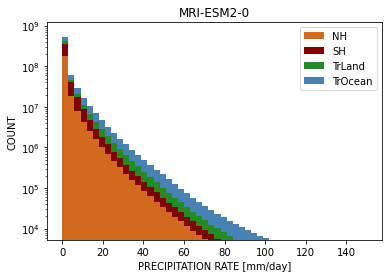

In [109]:
bctr = prbins[0:-1] + 0.5*(prbins[1:]-prbins[0:-1])
width = 3
fig, ax = plt.subplots()
ax.bar(bctr, h_nh[0], color='chocolate', width=width, label='NH')
ax.bar(bctr, h_sh[0], color='maroon', bottom=h_nh[0], width=width, label='SH')
ax.bar(bctr, h_trop_land[0], color='forestgreen', bottom=h_nh[0]+h_sh[0], width=width, label='TrLand')
ax.bar(bctr, h_trop_ocean[0], color='steelblue', bottom=h_nh[0]+h_sh[0]+h_trop_land[0], width=width, label='TrOcean')
ax.semilogy()
# ax.set_ylim([0, 1e5])
ax.legend()
ax.set_ylabel('COUNT')
ax.set_xlabel('PRECIPITATION RATE [mm/day]')
ax.set_title(model_name)
fig.savefig(f"/Users/brianpm/Dropbox/Manuscripts/M_cre_pex/REVISION1/pr_histogram_{model_name}_{experiment_name}.png", dpi=144)

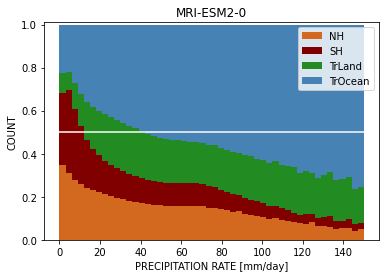

In [110]:
# alternatively, show each bin's fractional contributions

bctr = prbins[0:-1] + 0.5*(prbins[1:]-prbins[0:-1])

tot = h_nh[0]+h_sh[0]+h_trop_land[0]+h_trop_ocean[0]

width = 3
fig, ax = plt.subplots()
ax.bar(bctr, h_nh[0]/tot, color='chocolate', width=width, label='NH')
ax.bar(bctr, h_sh[0]/tot, color='maroon', bottom=h_nh[0]/tot, width=width, label='SH')
ax.bar(bctr, h_trop_land[0]/tot, color='forestgreen', bottom=(h_nh[0]+h_sh[0])/tot, width=width, label='TrLand')
ax.bar(bctr, h_trop_ocean[0]/tot, color='steelblue', bottom=(h_nh[0]+h_sh[0]+h_trop_land[0])/tot, width=width, label='TrOcean')
# ax.semilogy()
ax.set_ylim([0,1.01])
ax.axhline(.5, color='w')
ax.legend()
ax.set_ylabel('COUNT')
ax.set_xlabel('PRECIPITATION RATE [mm/day]')
ax.set_title(model_name)
fig.savefig(f"/Users/brianpm/Dropbox/Manuscripts/M_cre_pex/REVISION1/pr_histogram_fractional_{model_name}_{experiment_name}.png", dpi=144)